In [ ]:
import numpy as np, matplotlib.pyplot as plt

True
[ True  True  True ...  True  True  True]
(4, 20000)
weight matrix =  [[5.1 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [5.1 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]]


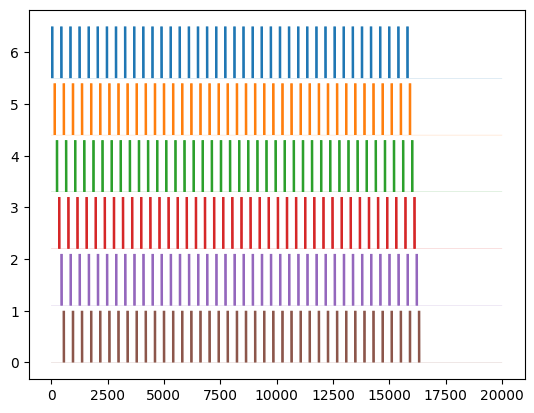

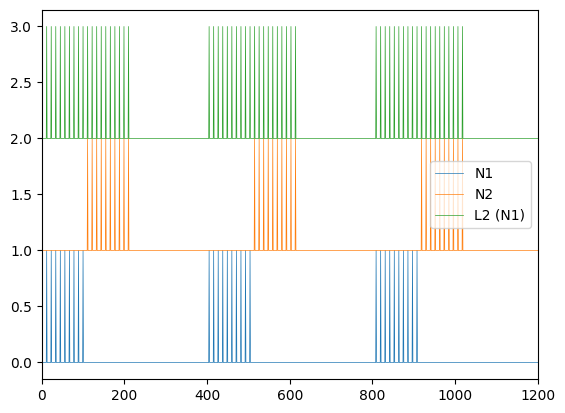

In [ ]:
# plt.style.use(['custom','no-latex'])

# Neurons (N number of neuron in first layer) (M number of neuron in second layer)
N,M = 4,16
# Spike time on, Spike time off, Spike per burst, Number of burst
st_on,st_off,sp_b,b_c=1,10,10,40
# first spike time
t0 = 1
# spike amplitude
sp_a = 1
# Total Time
tot_T= 20000
t=np.arange(tot_T)

N1,N2,N3,N4,N5,N6=np.zeros(tot_T),np.zeros(tot_T),np.zeros(tot_T),np.zeros(tot_T),np.zeros(tot_T),np.zeros(tot_T)
N_all = np.zeros((N,tot_T))
si=np.array([t0+(st_on+st_off)*(i-1) for i in range(1,sp_b+1,1)]).astype('int')
sf=np.array([(t0+st_on)+(st_on+st_off)*(i-1) for i in range(1,sp_b+1,1)]).astype('int')

# Busrt duration
ib_t=sf[-1]-si[0]+1

for i in range(b_c):
    for j in range(sp_b):
        N1[((i*N*ib_t)+si[j]):((i*N*ib_t)+sf[j])]=sp_a
        N_all[0][((i*N*ib_t)+si[j]):((i*N*ib_t)+sf[j])]=sp_a
for i in range(b_c):
    for j in range(sp_b):
        N2[((N*i+1)*ib_t+(st_off-t0)+si[j]):((N*i+1)*ib_t+(st_off-t0)+sf[j])]=sp_a

for i in range(b_c):
    for j in range(sp_b):
        N3[((N*i+2)*ib_t+(st_off-t0)+si[j]):((N*i+2)*ib_t+(st_off-t0)+sf[j])]=sp_a

for i in range(b_c):
    for j in range(sp_b):
        N4[((N*i+3)*ib_t+(st_off-t0)+si[j]):((N*i+3)*ib_t+(st_off-t0)+sf[j])]=sp_a

for i in range(b_c):
    for j in range(sp_b):
        N5[((N*i+4)*ib_t+(st_off-t0)+si[j]):((N*i+4)*ib_t+(st_off-t0)+sf[j])]=sp_a

for i in range(b_c):
    for j in range(sp_b):
        N6[((N*i+5)*ib_t+(st_off-t0)+si[j]):((N*i+5)*ib_t+(st_off-t0)+sf[j])]=sp_a

for k in range(1,N):
  for i in range(b_c):
    for j in range(sp_b):
      N_all[k][(((N*i)+k)*ib_t+(st_off - t0)+si[j]):(((N*i)+k)*ib_t+(st_off - t0)+sf[j])] = sp_a
      #break

#print(np.allclose(N_all,[N1,N2,N3,N4,N5,N6]))
print(np.allclose(N4,N_all[3]))
plt.step(t,N1+5.5,lw=0.1)
plt.step(t,N2+4.4,lw=0.1)
plt.step(t,N3+3.3,lw=0.1)
plt.step(t,N4+2.2,lw=0.1)
plt.step(t,N5+1.1,lw=0.1)
plt.step(t,N6,lw=0.1)

vth=5
# L1 is all the neurons in layer one.
# L2 is all the neuron in Layer two
# L1=np.append([N1],[N2,N3,N4,N5,N6],axis=0)
L1 = N_all
L2=np.zeros([M,tot_T])
print(L1[0]==N1)
print(L1.shape)
# print(L2.shape)

# weight matrix
# connections from L1 to L2
g=np.zeros([N,M])
# weights from L1 neuron 1 to L2 neuron 1, L1 neuron 2 to L2 neuron 1 (L1 = N1 + N2)
g[0][0],g[1][0]=vth+0.1,vth+0.1
print("weight matrix = ", g)

# second layer calculation
temp=0
for tt in range(tot_T):
    for j in range(M):
        for i in range(N):
            temp=temp+g[i][j]*L1[i][tt]
        if temp>vth:
            L2[j][tt]=1
            temp=0
        else:
            L2[j][tt]=temp

plt.figure()
plt.plot(t,N1,lw=0.5,label='N1')
plt.plot(t,N2+1,lw=0.5,label='N2')
plt.plot(t,L2[0][:]+2,lw=0.5,label='L2 (N1)')
plt.legend(loc='best')
plt.xlim(0,1200)

plt.show()

In [ ]:
tot_spk = 0
target_spk_times = np.zeros((M, sp_b*2), dtype=np.int64)
for t in range(300):
    if L2[0][t] > 0:
        # target_spk_times.append(t)
        target_spk_times[0][tot_spk] = t
        tot_spk += 1
        # print("Spike time: ", t)

print("Total spikes: ", tot_spk)
print("Target spike times: ", target_spk_times[0])

Total spikes:  20
Target spike times:  [  1  12  23  34  45  56  67  78  89 100 111 122 133 144 155 166 177 188
 199 210]


In [ ]:
def train_STDP(lrn_rate, tpre, tpost, tau_learn):
    return lrn_rate * np.exp(np.sign(tpre-tpost)*(tpost-tpre)/tau_learn)

In [ ]:
# run STDP for just L1 = N1 + N2 first (g[0][0],g[1][0])
tot_T = 20000
L2_train=np.zeros([M,tot_T])
train_g = np.zeros((N, M))
target_g = g

wt_train_check = np.zeros((N, M))
wt_conv_thresh = 10
conv_spike_dist = 10

np.random.seed(seed=0)
round_to_dp = 10    # decimal places
scale = 1
loc = 5
loc_high = 20
for i in range(N):
  for j in range(M):
    train_g[i][j] = round(np.random.normal(loc=loc, scale=scale), round_to_dp)
# train_g[1][0] = round(np.random.normal(loc=loc, scale=scale), round_to_dp)
# train_g[2][0] = round(np.random.normal(loc=loc_high, scale=scale), round_to_dp)

lrn_rate = 1e-1
tau_learn = 100


st_learn = 1200

epsilon = 10

# L2 should have 2 times the spikes/burst of L1
#spk_per_burst = sp_b * 2

spk_ctr = np.zeros(M, dtype=np.int64)

train_g_hist = np.zeros((tot_T, N, M))
delta_t = [[], []]

# debug
debug = []
maxx = 10

gait_dfn_matrix_crawl = np.zeros((N, M))

# gait_dfn_matrix_crawl = [[1, 1,  0,  0,  1,  1,  0,  0,  0,  0,  1,  1,  0,  0,  1,  1 ],
#                    [0, 1,  1,  0,  0,  1,  1,  0,  1,  0,  0,  1,  1,  0,  0,  1 ],
#                    [0, 0,  1,  1,  0,  0,  1,  1,  1,  1,  0,  0,  1,  1,  0,  0 ],
#                    [1, 0,  0,  1,  1,  0,  0,  1,  0,  1,  1,  0,  0,  1,  1,  0 ]]
gait_dfn_matrix_crawl = [[1, 0,  0,  1,  1,  0,  0,  1,  0,  1,  1,  0,  0,  1,  1,  0 ],
                        [1, 1,  0,  0,  1,  1,  0,  0,  0,  0,  1,  1,  0,  0,  1,  1 ],
                        [0, 1,  1,  0,  0,  1,  1,  0,  1,  0,  0,  1,  1,  0,  0,  1 ],
                        [0, 0,  1,  1,  0,  0,  1,  1,  1,  1,  0,  0,  1,  1,  0,  0 ]]

gait_dfn_matrix_walk = [[1, 0,  0,  0,  1,  0,  0,  0,  0,  1,  1,  1,  0,  1,  1,  1 ],
                        [0, 1,  0,  0,  0,  1,  0,  0,  1,  0,  1,  1,  1,  0,  1,  1 ],
                        [0, 0,  1,  0,  0,  0,  1,  0,  1,  1,  0,  1,  1,  1,  0,  1 ],
                        [0, 0,  0,  1,  0,  0,  0,  1,  1,  1,  1,  0,  1,  1,  1,  0 ]]

eventp = [[]] * N
temp=0
conv = np.full((N,M), False, dtype=bool)
conv_time = np.zeros((N,M))
for tt in range(tot_T):
    for j in range(M):    # L1
        for i in range(N):
            temp = temp+train_g[i][j]*L1[i][tt]

        if temp>vth:
            #eventp[j].append(tt)
            L2_train[j][tt]=1
            temp = 0

        else:
            L2_train[j][tt] = 0
            #temp = 0




    if tt >= st_learn: # and tt % cycle_t // update_freq == 0:
        for cur_neu in range(N):
            for conn in range(M):
                if gait_dfn_matrix_crawl[cur_neu][conn] == 1:
                    spk_t = N_all[cur_neu][tt]
                    if spk_t == 1:
                      for k in range(10):
                        if (L2_train[conn][tt-k]) == 1 and not conv[cur_neu][conn]:
                          conv[cur_neu][conn] = True
                          conv_time[cur_neu][conn] = tt
                          #print('here from top', cur_neu,conn)
                          continue
                        # elif eventp[conn]!=[]:
                        #else:
                      train_g[cur_neu][conn] = round(min(train_g[cur_neu][conn]+lrn_rate, maxx),round_to_dp)

                elif gait_dfn_matrix_crawl[cur_neu][conn] == 0:
                    spk_t = N_all[cur_neu][tt]
                    if spk_t == 1:
                      for k in range(10):
                        if (L2_train[conn][tt-k]) == 0 and not conv[cur_neu][conn]:
                          conv[cur_neu][conn] = True
                          conv_time[cur_neu][conn] = tt
                          #print('here from bottom', cur_neu,conn)
                          continue
                        # elif eventp[conn]!=[]:
                      #else:
                      train_g[cur_neu][conn] = round(max(train_g[cur_neu][conn]-lrn_rate, 0),round_to_dp)
                train_g_hist[tt][cur_neu][conn] = train_g[cur_neu][conn]

In [ ]:
print(f"Convergence time: ", conv_time, conv)

Convergence time:  [[1213. 1213. 1213. 1213. 1213. 1213. 1213. 1213. 1213. 1213. 1213. 1213.
  1213. 1213. 1213. 1213.]
 [1323. 1356. 1323. 1323. 1323. 1323. 1323. 1323. 1323. 1323. 1323. 1345.
  1323. 1323. 1323. 1323.]
 [1424. 1424. 1468. 1424. 1424. 1424. 1468. 1424. 1424. 1424. 1424. 1424.
  1424. 1424. 1424. 1424.]
 [1209. 1209. 1209. 1209. 1209. 1209. 1209. 1209. 1209. 1209. 1220. 1209.
  1220. 1209. 1220. 1209.]] [[ True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True]]


In [ ]:
print(train_g)
debug

[[10.  0.  0.  0. 10.  0.  0.  0.  0. 10. 10. 10.  0. 10. 10. 10.]
 [ 0. 10.  0.  0.  0. 10.  0.  0. 10.  0. 10. 10. 10.  0. 10. 10.]
 [ 0.  0. 10.  0.  0.  0. 10.  0. 10. 10.  0. 10. 10. 10.  0. 10.]
 [ 0.  0.  0. 10.  0.  0.  0. 10. 10. 10. 10.  0. 10. 10. 10.  0.]]


[]

0.0 0.0


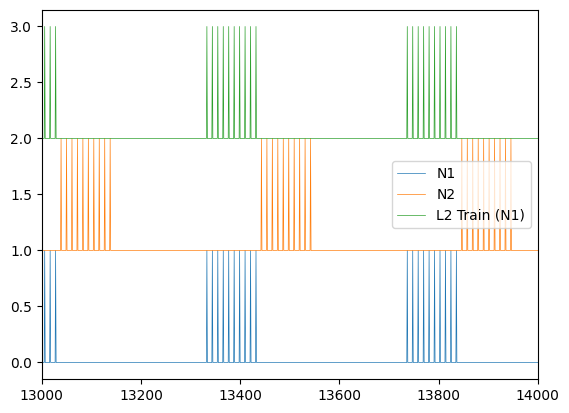

In [ ]:
t=np.arange(tot_T)
plt.figure()
plt.plot(t,N_all[0,:],lw=0.5,label='N1')
plt.plot(t,N_all[1,:]+1,lw=0.5,label='N2')
plt.plot(t,L2_train[0,:]+2,lw=0.5,label='L2 Train (N1)')
plt.legend(loc='best')
plt.xlim(13000, 14000)
# plt.xlim(0, 300)
# plt.ylim(0, 3)

print(train_g_hist[-1][2][0], train_g[2][0])

plt.show()

Converged weight:  10.0


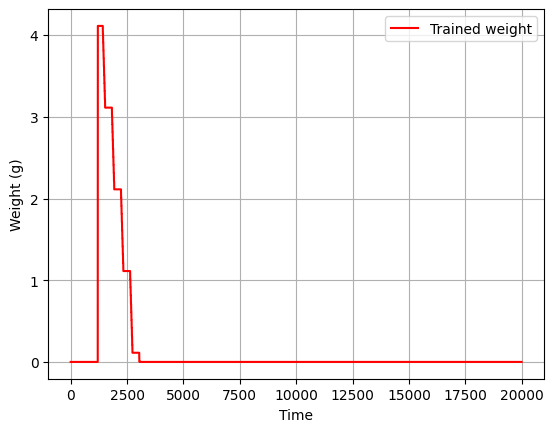

In [ ]:
#plt.plot(t, train_g_hist[:, 0, 0], '--sr', lw=0.2, label='Trained weight')
# plt.plot(t, train_g_hist[:, 0, 0], color='r', label='Trained weight')
plt.plot(t, train_g_hist[:, 2, 0], color='r', label='Trained weight')
plt.ylabel('Weight (g)')
plt.xlabel('Time')
# plt.axhline(target_g[0][0], color = 'g', label='Target weight')
plt.legend()
plt.grid()
print("Converged weight: ", train_g_hist[-1, 0, 0])
#plt.xlim(1200, 1300)

0 0


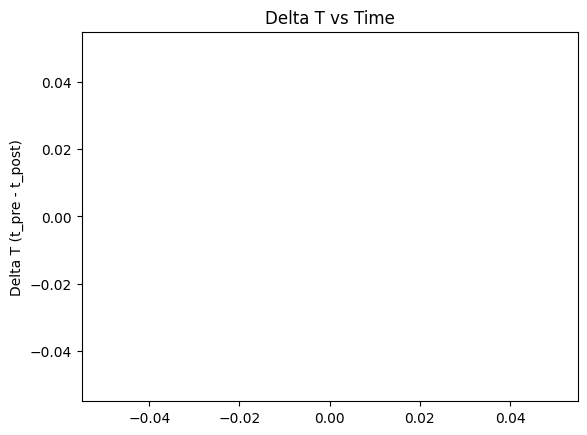

In [ ]:
plt.title('Delta T vs Time')
plt.plot(delta_t[0], '--sr')
plt.ylabel('Delta T (t_pre - t_post)')
print(len(delta_t[0]), len(delta_t[1]))
# plt.xlim(0, 100)
# plt.xlim(9100, 9200)

# delta_t = np.array(delta_t[0])
# print(np.where(delta_t == 0))
# print(L2[0, 10963])

In [ ]:
len(delta_t)

2